<a href="https://colab.research.google.com/github/ashtheflash1212/TensorFlow/blob/main/Tensorflow_CIFAR%2C_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [102]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [103]:
X_train.shape #5000 - sample size, 32 x 32 - height and width of image, 3 - RGB

(50000, 32, 32, 3)

In [104]:
y_train = y_train.reshape(-1,) #changing from a 2D array to a 1D array
y_test = y_test.reshape(-1,)

In [105]:
X_train = X_train / 255.0 #scaling images to be between 0 and 1
X_test = X_test / 255.0

In [106]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(input_shape=(32, 32, 3)), #3 because images are RGB
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #10 categories, probabilities will sum to 1
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #sparse_categorical is used because we match the image with a specific number labels instead of one-hot encoding
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3847 - loss: 1.6829
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.6039 - loss: 1.1246
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6563 - loss: 0.9829
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6888 - loss: 0.8971
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7056 - loss: 0.8365


In [107]:
model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[1.02506550e-02, 2.44114012e-03, 4.29099752e-03, 7.24389076e-01,
        1.91452028e-03, 1.40594155e-01, 3.51598188e-02, 2.39983870e-04,
        5.27549572e-02, 2.79647168e-02],
       [6.90335874e-03, 6.43229723e-01, 2.53783492e-05, 1.22228657e-05,
        8.99781389e-06, 3.91420691e-08, 1.11128294e-07, 2.71143790e-07,
        3.31011415e-01, 1.88084431e-02],
       [3.21773440e-02, 1.82486951e-01, 1.79854850e-03, 3.37523548e-03,
        8.73084064e-04, 1.38635878e-04, 3.97899683e-04, 8.76912090e-04,
        7.25876272e-01, 5.19990735e-02],
       [6.47789478e-01, 1.22871786e-01, 5.59561467e-03, 1.95479882e-03,
        6.39070645e-02, 2.52172991e-04, 4.86402569e-04, 1.30739296e-03,
        1.47067010e-01, 8.76828562e-03],
       [3.10842406e-05, 1.18632299e-04, 1.92084294e-02, 3.67885716e-02,
        4.43976671e-01, 2.55281711e-03, 4.96592194e-01, 1.56716033e-05,
        6.69653702e-04, 4.62434873e-05]], dtype=float32)

In [108]:
y_class = [np.argmax(element) for element in model.predict(X_test[:5])] #chooses maximum probability between each of the classes
y_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[3, 1, 8, 0, 6]

In [109]:
y_class = [np.argmax(element) for element in model.predict(X_test)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [110]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_class)) #precision puts emphasis on false positives, recall puts emphasis on false negatives

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.74      0.85      0.79      1000
           2       0.64      0.49      0.56      1000
           3       0.52      0.47      0.49      1000
           4       0.58      0.71      0.64      1000
           5       0.68      0.49      0.57      1000
           6       0.73      0.78      0.75      1000
           7       0.76      0.70      0.73      1000
           8       0.76      0.79      0.77      1000
           9       0.68      0.80      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [111]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [112]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]]) #if y_test[index] = 3, then classes[3] provides the preidcted label

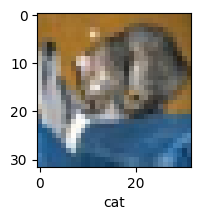

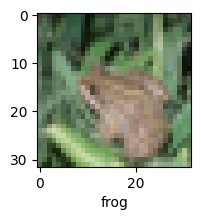

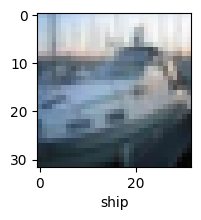

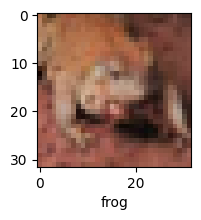

In [128]:
plot_sample(X_test, y_test, 0)
plot_sample(X_test, y_test, 4)
plot_sample(X_test, y_test, 2)
plot_sample(X_test, y_test, 5)

In [114]:
(X_train_two, y_train_two), (X_test_two, y_test_two) = datasets.mnist.load_data()

In [115]:
print(X_train_two.shape)
print(y_train_two.shape)
print(y_train_two[:5])

(60000, 28, 28)
(60000,)
[5 0 4 1 9]


In [116]:
X_train_two = X_train_two/255.0
X_test_two = X_test_two/255.0

In [117]:
print(X_train_two.shape)
print(y_train_two.shape)

(60000, 28, 28)
(60000,)


In [118]:
model = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(56, activation='relu'),
    layers.Dense(10, activation='softmax') #10 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_two, y_train_two, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9027 - loss: 0.3148
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9832 - loss: 0.0518
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9897 - loss: 0.0324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9927 - loss: 0.0237
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9943 - loss: 0.0190


In [119]:
model.predict(X_test_two[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[6.75017645e-07, 1.70801364e-08, 1.29064883e-05, 1.64842801e-04,
        1.27834254e-09, 4.77136496e-07, 7.32532416e-13, 9.98973966e-01,
        4.02770951e-07, 8.46778159e-04],
       [2.57375916e-08, 3.17730802e-08, 1.00000000e+00, 1.03322982e-12,
        1.33199410e-10, 1.70917484e-15, 9.91801485e-09, 1.31040331e-10,
        2.59237021e-10, 3.67209374e-08],
       [2.57449301e-07, 9.99826849e-01, 5.26168151e-07, 1.64070642e-08,
        6.84046754e-05, 1.29822251e-06, 3.45048477e-07, 7.34990172e-05,
        1.25430588e-05, 1.63376080e-05],
       [9.99998927e-01, 5.57045295e-12, 8.26919777e-09, 6.78934065e-09,
        1.92267702e-10, 8.75500727e-10, 5.83302437e-07, 4.33446811e-12,
        1.13747625e-07, 3.85019803e-07],
       [1.70861858e-09, 3.13380930e-08, 1.76307555e-08, 2.08121298e-09,
        9.99579966e-01, 2.22772893e-08, 1.62652380e-09, 5.24486810e-09,
        3.47452357e-07, 4.19578893e-04]], dtype=float32)

In [120]:
predictions = [np.argmax(element) for element in model.predict(X_test_two)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [121]:
predictions[:5]

[7, 2, 1, 0, 4]

In [122]:
y_test_two[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [123]:
print("Classification Report: \n", classification_report(y_test_two, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [124]:
classes_two = ["0","1","2","3","4","5","6","7","8","9"]

In [125]:
def plot_sample_two(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes_two[y[index]]) #if y_test[index] = 3, then classes[3] provides the preidcted label

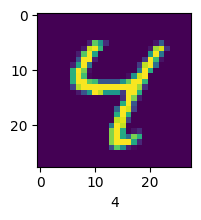

In [126]:
plot_sample_two(X_test_two, y_test_two, 6)